<a href="https://colab.research.google.com/github/Sof-X/DL-training/blob/main/simpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,) #-1 to keep first dimension #2nd slot empty to reshpae 2nd
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

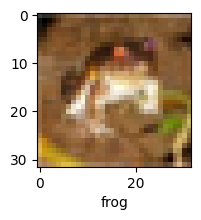

In [7]:
plot_sample(X_train, y_train, 0)

In [8]:
X_train = X_train /255
X_test = X_test / 255

# 1) nn training

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy', #because output is a number (8) which means class 9
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 85ms/step - accuracy: 0.3027 - loss: 1.9329
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 83ms/step - accuracy: 0.4169 - loss: 1.6467
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 82ms/step - accuracy: 0.4506 - loss: 1.5568
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 82ms/step - accuracy: 0.4763 - loss: 1.4865
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 82ms/step - accuracy: 0.4982 - loss: 1.4393


In [10]:
ann.evaluate  (X_test, y_test) #46% accuracy is rly bad
#bad performance on this dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4677 - loss: 1.5137


[1.5163025856018066, 0.4603999853134155]

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:  \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report:  
               precision    recall  f1-score   support

           0       0.45      0.61      0.52      1000
           1       0.69      0.44      0.54      1000
           2       0.36      0.36      0.36      1000
           3       0.38      0.23      0.28      1000
           4       0.40      0.41      0.40      1000
           5       0.52      0.26      0.35      1000
           6       0.39      0.73      0.50      1000
           7       0.67      0.41      0.51      1000
           8       0.42      0.77      0.54      1000
           9       0.67      0.38      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



# 2) CNN

In [14]:
cnn = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'), #Most of the work is done by CNN
        layers.Dense(10, activation='softmax')  # no need for many Dense layers
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', #because output is a number (8) which means class 9
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.3862 - loss: 1.6854
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6063 - loss: 1.1314
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6584 - loss: 0.9873
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6866 - loss: 0.8936
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7170 - loss: 0.8159
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7345 - loss: 0.7613
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7525 - loss: 0.7056
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7727 - loss: 0.6479
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7894 - loss: 0.6022
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7991 - loss: 0.5713


In [15]:
cnn.evaluate(X_test, y_test)    # tough dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6937 - loss: 0.9695


[0.9784778356552124, 0.6926000118255615]

In [16]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

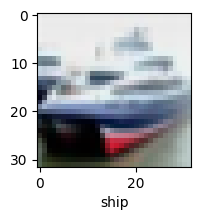

In [17]:
plot_sample(X_test, y_test, 1)

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]  #softmax

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[1.64477050e-03, 8.37488042e-05, 3.02681932e-03, 7.96334028e-01,
        8.10932426e-04, 1.95016608e-01, 1.64737715e-03, 6.14701958e-06,
        1.39254529e-03, 3.70379494e-05],
       [4.87674086e-04, 1.41267076e-01, 2.84786461e-06, 1.98418320e-07,
        2.88400450e-08, 1.28687745e-08, 1.41835899e-09, 2.82982562e-08,
        8.57984781e-01, 2.57242646e-04],
       [5.76855130e-02, 5.44376932e-02, 1.47796620e-03, 1.79585163e-02,
        4.62086522e-04, 2.71725166e-03, 2.14262473e-04, 3.49410507e-03,
        8.44618022e-01, 1.69345401e-02],
       [7.37617373e-01, 3.95400077e-03, 1.51656449e-01, 1.10396277e-02,
        1.07731484e-03, 5.38168060e-05, 9.74089955e-04, 1.49545464e-04,
        9.34722349e-02, 5.51718722e-06],
       [5.77386061e-07, 2.94263509e-06, 1.19102746e-01, 6.95561290e-01,
        7.91606978e-02, 3.71805839e-02, 6.89718872e-02, 1.53610586e-06,
        1.62611232e-05, 1.37967470e-06]], dtype=float32)

In [23]:
y_classes = [ np.argmax(element) for element in y_pred] #number 3 is max predicted element
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(3)]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

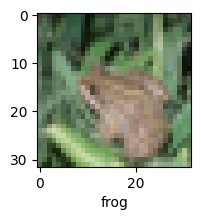

In [30]:
plot_sample(X_test, y_test, 4) #actual value

In [31]:
classes[y_classes[4]] #predicted value

'cat'

In [34]:
print("Classification Report:  \n", classification_report(y_test, y_classes))

Classification Report:  
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.80      0.81      0.80      1000
           2       0.53      0.67      0.59      1000
           3       0.50      0.51      0.50      1000
           4       0.75      0.54      0.63      1000
           5       0.53      0.69      0.60      1000
           6       0.84      0.74      0.79      1000
           7       0.80      0.71      0.75      1000
           8       0.87      0.73      0.79      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

